In [1]:
import random
import collections
import math
import sys
import copy
import pandas as pd
import os
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
newTrain = pd.read_csv('newTrain.csv')

In [3]:
newTest = pd.read_csv('newTest.csv')

In [4]:
newTrain.drop(newTrain.columns[0],axis=1,inplace=True)
newTest.drop(newTest.columns[0],axis=1,inplace=True)

In [5]:
newTrain['truth'] += 1
newTrain['truth'] /= 2

newTrain['characters2'] += 1
newTrain['characters2'] /= 2

newTrain['characters3'] += 1
newTrain['characters3'] /= 2

newTrain['characters4'] += 1
newTrain['characters4'] /= 2

newTrain['combined'] += 1
newTrain['combined'] /= 2

newTrain['words'] += 1
newTrain['words'] /= 2



newTest['truth'] += 1
newTest['truth'] /= 2

newTest['characters2'] += 1
newTest['characters2'] /= 2

newTest['characters3'] += 1
newTest['characters3'] /= 2

newTest['characters4'] += 1
newTest['characters4'] /= 2

newTest['combined'] += 1
newTest['combined'] /= 2

newTest['words'] += 1
newTest['words'] /= 2

In [6]:
newTrain.head()

,created,day,hr,month,name,text,truth,characters2,characters4,characters3,combined,words,numbersInName,specialCharsText,capsInText,hashTags,mentions
0,2017-03-12 14:05:59,12.0,14.0,3.0,queenofthewo,"Dude, you need friends #UnlikelyMagic8BallAns...",0.0,0.0,0.0,0.0,0.0,0.0,0,0.160000,0.100000,0.020000,0.000000
1,2013-02-10 02:01:00,10.0,2.0,2.0,flozimoet,"Love likes the fire, it can‰ЫЄt be made a fool...",1.0,1.0,1.0,1.0,1.0,1.0,0,0.271429,0.014286,0.000000,0.000000
2,2016-10-20 15:20:01,20.0,15.0,10.0,ten_gop,"""This isn't a Justice Department anymore. This...",0.0,0.0,0.0,0.0,0.0,0.0,0,0.223077,0.100000,0.000000,0.000000
3,2010-06-01 14:56:00,1.0,14.0,6.0,samwagik,Happy birthday to my oga at the top @ukenyatta...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.186441,0.050847,0.016949,0.016949
4,2017-03-31 09:42:00,31.0,9.0,3.0,mrclydepratt,RT @lenaporter23: Hell! They put the drugs in ...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.250000,0.119565,0.000000,0.010870


In [7]:
newTrain.shape

(20000, 17)

In [8]:
newTest.shape

(2000, 17)

In [9]:
train_x = newTrain.drop(columns=['truth','created','name','text'])
train_x['day'] = train_x['day'].astype(int)
train_x['hr'] = train_x['hr'].astype(int)
train_x['month'] = train_x['month'].astype(int)

train_y = newTrain[['truth']]

In [10]:
test_x = newTest.drop(columns=['truth','created','name','text'])
test_x['day'] = test_x['day'].astype(int)
test_x['hr'] = test_x['hr'].astype(int)
test_x['month'] = test_x['month'].astype(int)

test_y = newTest[['truth']]

In [11]:
train_x.describe(include='all')

,day,hr,month,characters2,characters4,characters3,combined,words,numbersInName,specialCharsText,capsInText,hashTags,mentions
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,15.92260,12.208700,6.694600,0.502600,0.500000,0.500350,0.500900,0.50655,0.604450,0.238764,0.107062,0.005907,0.007578
std,8.58321,6.002103,3.574069,0.500006,0.500013,0.500012,0.500012,0.49997,1.432373,0.054246,0.087240,0.010341,0.010028
min,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.00000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.205607,0.054054,0.000000,0.000000
50%,16.00000,13.000000,7.000000,1.000000,0.500000,1.000000,1.000000,1.00000,0.000000,0.233577,0.096774,0.000000,0.007143
75%,23.00000,17.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.267857,0.134921,0.009615,0.011765
max,31.00000,23.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.00000,12.000000,1.000000,1.000000,0.166667,0.093525


In [12]:
# sns.pairplot(train_x)

In [13]:
# sns.heatmap(train_x.corr(), annot=True)

In [14]:
train_x.head()

,day,hr,month,characters2,characters4,characters3,combined,words,numbersInName,specialCharsText,capsInText,hashTags,mentions
0,12,14,3,0.0,0.0,0.0,0.0,0.0,0,0.160000,0.100000,0.020000,0.000000
1,10,2,2,1.0,1.0,1.0,1.0,1.0,0,0.271429,0.014286,0.000000,0.000000
2,20,15,10,0.0,0.0,0.0,0.0,0.0,0,0.223077,0.100000,0.000000,0.000000
3,1,14,6,1.0,1.0,1.0,1.0,1.0,0,0.186441,0.050847,0.016949,0.016949
4,31,9,3,0.0,0.0,0.0,0.0,0.0,0,0.250000,0.119565,0.000000,0.010870


In [15]:
train_y.head()

,truth
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [16]:
train_x_dropped = train_x.drop(columns=['day','hr','month','capsInText','hashTags','mentions'])

In [17]:
test_x_dropped = test_x.drop(columns=['day','hr','month','capsInText','hashTags','mentions'])

In [18]:
train_x_dropped.head()

,characters2,characters4,characters3,combined,words,numbersInName,specialCharsText
0,0.0,0.0,0.0,0.0,0.0,0,0.160000
1,1.0,1.0,1.0,1.0,1.0,0,0.271429
2,0.0,0.0,0.0,0.0,0.0,0,0.223077
3,1.0,1.0,1.0,1.0,1.0,0,0.186441
4,0.0,0.0,0.0,0.0,0.0,0,0.250000


In [19]:
# np_train_x = train_x.to_numpy()
np_train_y = train_y.to_numpy()

# np_test_x = test_x.to_numpy()
np_test_y = test_y.to_numpy()

np_train_x = train_x_dropped.to_numpy()
np_test_x = test_x_dropped.to_numpy()

In [20]:
np_train_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16      ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.27142857],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.22307692],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.27737226],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.24603175]])

In [21]:
np_train_y

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
np_train_x = sc.fit_transform(np_train_x)
np_test_x = sc.fit_transform(np_test_x)

In [23]:
np_train_x

array([[-1.00521359, -1.        , -1.00070025, ..., -1.01318694,
        -0.42200255, -1.45200904],
       [ 0.99481345,  1.        ,  0.99930024, ...,  0.98698469,
        -0.42200255,  0.60216218],
       [-1.00521359, -1.        , -1.00070025, ..., -1.01318694,
        -0.42200255, -0.28919417],
       ...,
       [ 0.99481345,  1.        ,  0.99930024, ...,  0.98698469,
        -0.42200255,  0.71173335],
       [ 0.99481345,  1.        ,  0.99930024, ...,  0.98698469,
        -0.42200255, -0.71461424],
       [-1.00521359, -1.        , -1.00070025, ..., -1.01318694,
        -0.42200255,  0.13397501]])

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.callbacks import TensorBoard
from sklearn import preprocessing
from keras.regularizers import l2, l1
from keras.utils import plot_model

Using TensorFlow backend.


In [25]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [26]:
classifier = Sequential()
# classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=7))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=7))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [27]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [28]:
history = classifier.fit(np_train_x, np_train_y, batch_size=100, epochs=10, validation_split=0.1)

Train on 18000 samples, validate on 2000 samples
Epoch 1/10
18000/18000 [==============================] - 1s 81us/sample - loss: 0.6929 - accuracy: 0.5384 - val_loss: 0.6880 - val_accuracy: 0.9935
Epoch 2/10
18000/18000 [==============================] - 1s 30us/sample - loss: 0.5508 - accuracy: 0.8724 - val_loss: 0.3763 - val_accuracy: 1.0000
Epoch 3/10
18000/18000 [==============================] - 1s 30us/sample - loss: 0.2923 - accuracy: 0.9994 - val_loss: 0.2507 - val_accuracy: 1.0000
Epoch 4/10
18000/18000 [==============================] - 1s 31us/sample - loss: 0.2246 - accuracy: 0.9995 - val_loss: 0.2069 - val_accuracy: 1.0000
Epoch 5/10
18000/18000 [==============================] - 1s 31us/sample - loss: 0.1890 - accuracy: 0.9996 - val_loss: 0.1765 - val_accuracy: 1.0000
Epoch 6/10
18000/18000 [==============================] - 1s 31us/sample - loss: 0.1626 - accuracy: 0.9996 - val_loss: 0.1529 - val_accuracy: 1.0000
Epoch 7/10
18000/18000 [==============================] -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


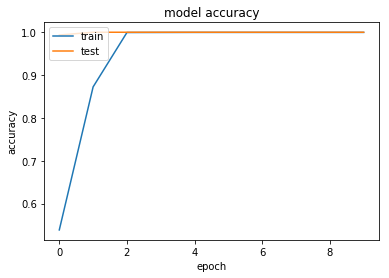

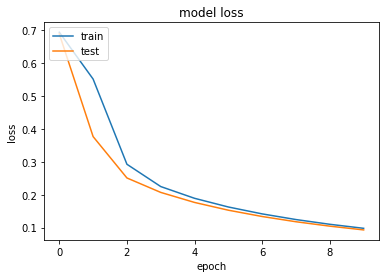

In [29]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
classifier.evaluate(np_train_x, np_train_y, verbose=0)

[0.09248810684680939, 0.99965]

In [31]:
y_pred=classifier.predict(np_test_x)
y_pred =(y_pred>0.5)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np_test_y, y_pred)
print(cm)

[[948  52]
 [114 886]]


In [35]:
# from sklearn.model_selection import RandomizedSearchCV

# classifier = Sequential()
# distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
# clf = RandomizedSearchCV(classifier, distributions, random_state=0)
# search = clf.fit(np_train_x, np_train_y)
# search.best_params_

In [36]:
# from sklearn.model_selection import GridSearchCV

# classifier = Sequential()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# clf = GridSearchCV(classifier, parameters)
# search = clf.fit(np_train_x, np_train_y)
# search.best_params_

In [33]:
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [35]:
rf.fit(np_train_x, np_train_y)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [36]:
y_pred_rf = rf.predict(np_test_x)

In [37]:
y_pred_rf =(y_pred_rf>0.5)

In [38]:
cm = confusion_matrix(np_test_y, y_pred_rf)
print(cm)

[[930  70]
 [190 810]]


In [39]:
feature_list = list(train_x_dropped.columns)

In [40]:
# Visualization
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('tree.png')

In [41]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(np_train_x, np_train_y)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file='small_tree.dot', feature_names=feature_list, rounded=True, precision=1)
# (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
# graph.write_png('small_tree.png');

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
y_pred_rf_small = rf_small.predict(np_test_x)
y_pred_rf_small =(y_pred_rf_small>0.5)
cm = confusion_matrix(np_test_y, y_pred_rf_small)
print(cm)

[[930  70]
 [190 810]]
